In [4]:
import numpy as np
from google.colab import files
import pandas as pd
import io

In [3]:
data_files = files.upload()

Saving admit.txt to admit.txt
Saving qa.txt to qa.txt


In [6]:
data = pd.read_csv(io.BytesIO(data_files['admit.txt']),names=['ex1','ex2','Admitted'])
print(data)

X=np.c_[data['ex1'],data['ex2']]
Y=data['Admitted']
m=len(data)

print(X.shape, Y.shape)

          ex1        ex2  Admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]
(100, 2) (100,)


In [9]:
pos = []
neg = []

for(i,val) in enumerate(Y):
  if val==1:
    pos.append(i)
  else:
    neg.append(i)

print(pos)
print(neg)

[3, 4, 6, 7, 8, 9, 12, 13, 15, 16, 18, 19, 21, 24, 25, 26, 30, 31, 33, 37, 40, 42, 46, 47, 48, 49, 50, 51, 52, 56, 58, 59, 60, 66, 68, 69, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 87, 88, 90, 91, 93, 94, 95, 96, 97, 98, 99]
[0, 1, 2, 5, 10, 11, 14, 17, 20, 22, 23, 27, 28, 29, 32, 34, 35, 36, 38, 39, 41, 43, 44, 45, 53, 54, 55, 57, 61, 62, 63, 64, 65, 67, 70, 78, 79, 86, 89, 92]


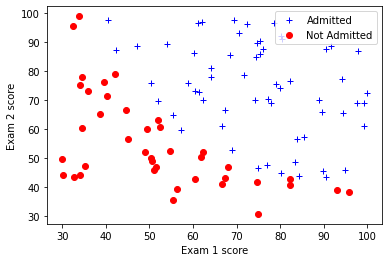

In [10]:
import matplotlib.pyplot as plt
plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label="Admitted")
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')
plt.show()

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', C=10)
log_reg.fit(X,Y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
log_reg.predict([[30,70],[50,90]])

array([0, 1])

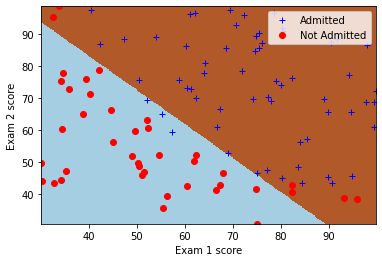

In [19]:
X_min, X_max = X[:,0].min(), X[:,0].max()
Y_min, Y_max = X[:,1].min(), X[:,1].max()

h = .2

xx,yy = np.meshgrid(np.arange(X_min, X_max,h), np.arange(Y_min,Y_max,h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,Z, cmap=plt.cm.Paired)

plt.plot(X[pos,0].reshape(-1), X[pos,1].reshape(-1), 'b+', label="Admitted")
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1), 'ro', label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='upper right')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

In [25]:
data = pd.read_csv(io.BytesIO(data_files['qa.txt']),names=['t1','t2','Passed'])
print(data)
X = np.c_[data['t1'],data['t2']]
Y = data['Passed']
m = len(data)

print(X.shape, Y.shape)

           t1        t2  Passed
0    0.051267  0.699560       1
1   -0.092742  0.684940       1
2   -0.213710  0.692250       1
3   -0.375000  0.502190       1
4   -0.513250  0.465640       1
..        ...       ...     ...
113 -0.720620  0.538740       0
114 -0.593890  0.494880       0
115 -0.484450  0.999270       0
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0

[118 rows x 3 columns]
(118, 2) (118,)


In [27]:
pos = []
neg = []

for(i,val) in enumerate(Y):
  if val==1:
    pos.append(i)
  else:
    neg.append(i)

print(pos)
print(neg)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]
[58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117]


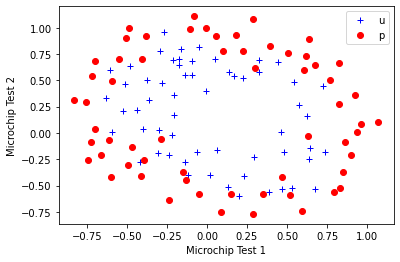

In [29]:
plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1),'ro', label='Failed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend('upper right')
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
degree = 6
poly_features = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0])
print(X_poly[0].shape)

[0.051267 0.69956 ]
(27,)


In [40]:
log_reg = LogisticRegression(penalty='l2', solver='liblinear', C=1e-1)
log_reg.fit(X_poly, Y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]


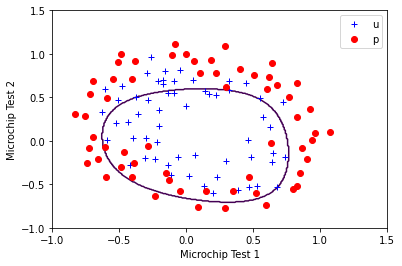

In [42]:
u = np.linspace(-1, 1.5, 300)
v = np.linspace(-1, 1.5, 300)
z = np.zeros((len(u),len(v)))

for i in range(len(u)):
  a=[]
  for j in range(len(v)):
    a.append(np.array([u[i],v[j]]))

  my_data = poly_features.fit_transform(a)
  z[i] = log_reg.predict(my_data)

plt.contour(u,v,z,0)

plt.plot(X[pos,0].reshape(-1),X[pos,1].reshape(-1),'b+', label='Passed')
plt.plot(X[neg,0].reshape(-1), X[neg,1].reshape(-1),'ro', label='Failed')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend('upper right')
plt.show()

[[46 14]
 [16 42]]


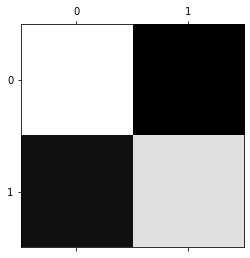

precision_score:  0.75
recall_score:  0.7241379310344828
F1_score:  0.736842105263158


In [47]:
y_pred = log_reg.predict(X_poly)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(Y,y_pred)
print(conf_mat)
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

from sklearn.metrics import precision_score, recall_score
print("precision_score: ",precision_score(Y,y_pred))
print("recall_score: ",recall_score(Y,y_pred))

from sklearn.metrics import f1_score
print("F1_score: ",f1_score(Y,y_pred))

In [48]:
y_score = log_reg.decision_function(X_poly)
print(y_score)

[ 0.05721229  0.09031196  0.08026682  0.17053879  0.12428068  0.12804255
  0.15762518  0.13103297  0.10611841  0.05698076 -0.02303367 -0.08009722
 -0.08781319 -0.21166892 -0.03087887  0.07336408  0.15980733 -0.10426686
  0.07493999  0.06340612  0.01223171  0.06483144  0.05088184  0.06692669
  0.09972027  0.0039081  -0.04642661 -0.2288355   0.19104147 -0.04422837
 -0.48582731 -0.06976624  0.12417891  0.20140773  0.20043654  0.18558606
  0.14110412  0.17216763  0.17914447  0.08748364  0.12938355  0.05788662
 -0.07524136  0.10212642 -0.03704723  0.00922225 -0.25399059  0.14984191
 -0.08845407 -0.03267549  0.14628497  0.23248708  0.18795328  0.2312281
  0.22583701  0.16968366  0.19363608  0.13978443 -0.47339273 -0.11374384
  0.05569444 -0.27770043 -0.3643466  -0.1778768  -0.37102315 -0.73725405
 -0.39571626 -0.78450463 -0.69486198 -0.46788667 -0.5786725  -0.48962111
 -0.49382144 -0.4376614  -0.27751262 -0.10992105  0.0029229  -0.01829043
 -0.13858015 -0.09891484  0.02217236  0.07687025  0.

In [53]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y,y_score)

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr,tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1],'k--')
  plt.axis([0,1,0,1])
  plt.xlabel('FPR')
  plt.ylabel('TPR')


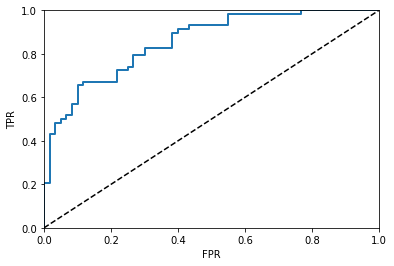

roc_auc_score:  0.8554597701149426


In [55]:
plot_roc_curve(fpr,tpr)
plt.show()

from sklearn.metrics import roc_auc_score
print("roc_auc_score: ",roc_auc_score(Y,y_score))